In [2]:
import imageio
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1660 SUPER, pci bus id: 0000:08:00.0, compute capability: 7.5



In [3]:
# Loading a model

model = load_model("test_model.h5")

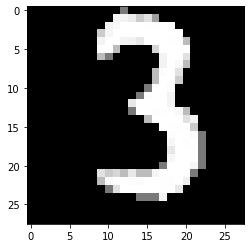

In [12]:
# Load image from a URL
#im = imageio.imread("https://i.imgur.com/a3Rql9C.png")
im = imageio.imread("3.png")

# Convert RGB values to grayscale
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()


In [13]:
print(gray)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 122.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 244. 244. 236.
  203. 225. 160.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 244. 249. 255. 255.
  255. 254. 254. 255. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 203. 246. 254. 255. 255.
  255. 255. 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 244. 255. 255. 243. 241.
  231. 255. 255. 255. 254. 255. 188.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 253. 255. 188.   0.   0.
    0.   0. 214. 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 188. 122.   0.   0.   0.
    0.   0.   0. 244. 255. 255. 225.   0.   0.   0.   0.  

In [14]:
# reshaping and normalizing the image

img_rows, img_cols = 28, 28
gray = gray.reshape(1, img_rows, img_cols, 1)
gray = gray / 255

In [15]:
# Predict digit

prediction = model.predict(gray)
print(prediction.argmax())

3


In [97]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

# Reshaping data to be ROWS x COLS x 1 since we have 784 neurons
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Since current values go from 0 to 255 we are going to divide them by 255 to get values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

y_test = to_categorical(y_test, 10)


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028088510036468506
Test accuracy: 0.9912999868392944


Model prediction: 3
Answer: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


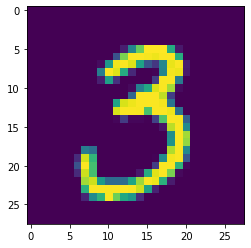

In [114]:

temp = 90
temp_img = x_test[temp].reshape(1, img_rows, img_cols, 1)
prediction = model.predict(temp_img)

print("Model prediction: %s\nAnswer: %s" % (prediction.argmax(), y_test[temp]))

plt.imshow(x_test[temp])
#plt.show()

In [105]:
print(type(gray))
print("----------------")
print(type(x_test[0]))

<class 'imageio.core.util.Array'>
----------------
<class 'numpy.ndarray'>
